**Лабораторная работа №2**

In [27]:
import math
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

Задание 1

In [28]:
def R_1(t, D, a):
    return D * math.exp(- a * abs(t))
def R_2(t, D, a, b):
    return D * math.exp(- a * abs(t))* (math.cos(b*t)+(a/b)*math.sin(a*abs(t)))
def Cum_1(t, D, a):
    return R_1(0, D, a) - R_1(t, D, a)
def Cum_2(t, D, a, b):
    return R_2(0, D, a, b) - R_2(t, D, a, b)
def S_1(l, D, a):
    return (D*a)/(math.pi*(a*a+l*l))
def S_2(l, D, a, b):
    return (2*D*a*(a*a+b*b))/((l*l+a*a-b*b)+4*a*a*b*b)    

Задание параметров

In [29]:
length = 100
h = range(0,100)
a = [0.1, 0.2, 0.3]
D = [4, 5, 6]
b = [0.1, 0.2, 0.3]

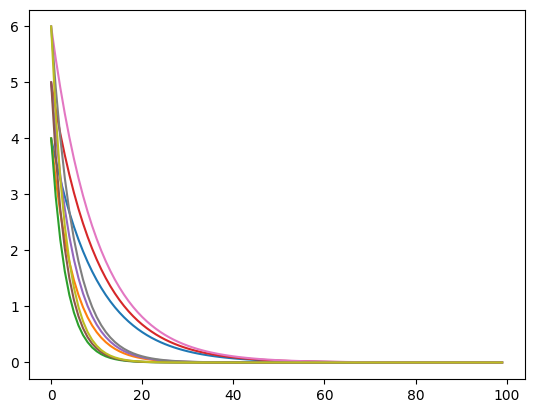

In [30]:

r_1 = [0.] * length
for j in range(3):
        for k in range(3):
            for i in range(100):
                r_1[i] = R_1(i, D[j], a[k])
            plt.plot(h, r_1)



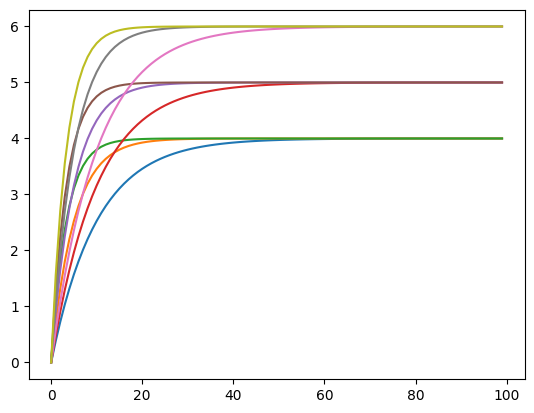

In [31]:
cum_1 = [0.] * length
for j in range(3):
        for k in range(3):
            for i in range(100):
                cum_1[i] = Cum_1(i, D[j], a[k])
            plt.plot(h, cum_1)

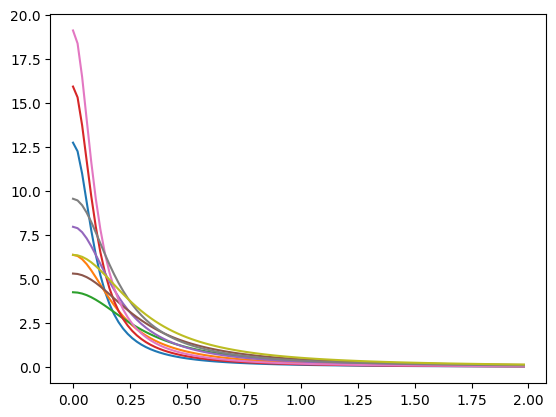

In [44]:
s_1 = [0.] * length
s = [0.] * length
cum_1 = [0.] * length
for j in range(3):
        for k in range(3):
            for i in range(100):
                s[i] = i/50
                s_1[i] = S_1(s[i], D[j], a[k])
            plt.plot(s, s_1)

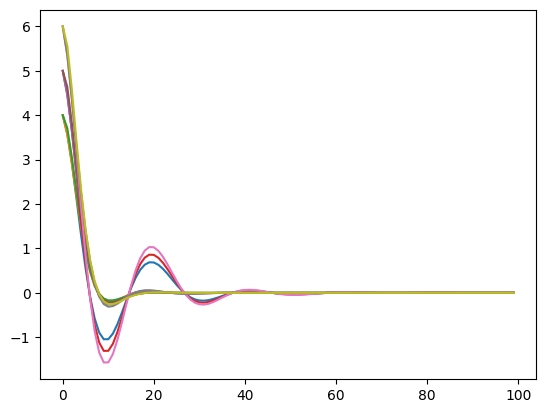

In [45]:
r_2 = [0.] * length
for j in range(3):
        for k in range(3):
            for l in range(3):
                for i in range(100):
                    r_2[i] = R_2(i, D[j], a[k], b[l])
            plt.plot(h, r_2)

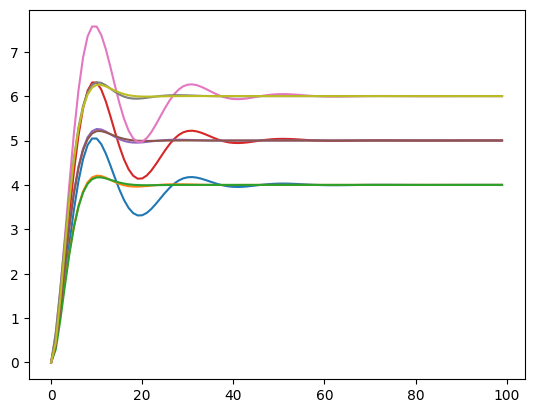

In [46]:
cum_2 = [0.] * length
for j in range(3):
        for k in range(3):
            for l in range(3):
                for i in range(100):
                    cum_2[i] = Cum_2(i, D[j], a[k], b[l])
            plt.plot(h, cum_2)

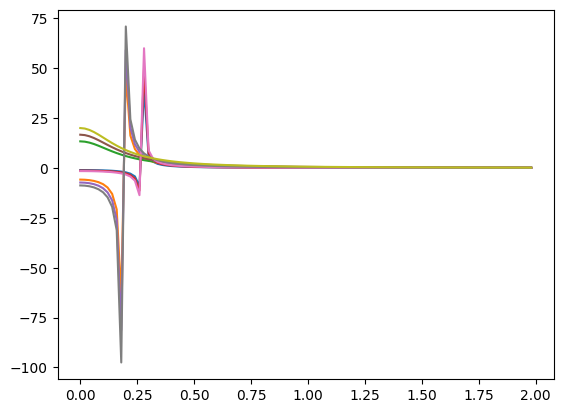

In [49]:
s_2 = [0.] * length
s = [0.] * length
for j in range(3):
        for k in range(3):
            for l in range(3):
                for i in range(100):
                    s[i] = i/50
                    s_2[i] = S_2(s[i], D[j], a[k], b[l])
            plt.plot(s, s_2)